# Import libraries

In [12]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pathlib import Path
import geopandas as gpd
from scipy import spatial

# Buildings

In [13]:
# Import Cambridge Shapefile Data 
shapefile_path='.././02 Data/Shapefile/Tangible-Table/'
buildings = gpd.read_file(shapefile_path+'Buildings.shp').to_crs(crs='EPSG:4326')
centroids =buildings.geometry.centroid
buildings['lon_POI']=[c.x for c in centroids]
buildings['lat_POI']=[c.y for c in centroids]
buildings.head()

C:\Users\a9048\anaconda3\envs\new_mobility\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


,Name,Shape_Leng,Shape_Area,lon_POI,lat_POI,usage,geometry
0,78 MT AUBURN ST,267.016007,4271.457031,-71.119131,42.371969,E,"POLYGON ((-71.11898 42.37203, -71.11911 42.371..."
1,99 INMAN ST,265.399199,3430.315186,-71.101911,42.371936,R,"POLYGON ((-71.10172 42.37192, -71.10177 42.371..."
2,65 JFK ST,503.046475,15895.593506,-71.121133,42.371860,None,"POLYGON ((-71.12083 42.37190, -71.12108 42.371..."
3,3-5 BOW ST,344.373206,4781.273926,-71.115942,42.372002,R,"POLYGON ((-71.11574 42.37193, -71.11587 42.371..."
4,686 CAMBRIDGE ST,210.972496,2766.545166,-71.088048,42.371909,R,"POLYGON ((-71.08793 42.37197, -71.08797 42.371..."


# DATAFRAMES FOR INPUT DATABASE

## RESIDENTIAL 

In [15]:
# Generate de dataframe with the RESIDENTIAL locations
residential_df=buildings[buildings['usage']=='R']
residential_df=residential_df.reset_index().drop('index',axis=1)
residential_df.head()

,Name,Shape_Leng,Shape_Area,lon_POI,lat_POI,usage,geometry
0,99 INMAN ST,265.399199,3430.315186,-71.101911,42.371936,R,"POLYGON ((-71.10172 42.37192, -71.10177 42.371..."
1,3-5 BOW ST,344.373206,4781.273926,-71.115942,42.372002,R,"POLYGON ((-71.11574 42.37193, -71.11587 42.371..."
2,686 CAMBRIDGE ST,210.972496,2766.545166,-71.088048,42.371909,R,"POLYGON ((-71.08793 42.37197, -71.08797 42.371..."
3,84 WILLOW ST,184.306219,1587.431396,-71.092388,42.371933,R,"POLYGON ((-71.09226 42.37193, -71.09230 42.371..."
4,26 SEVENTH ST,127.863382,799.135986,-71.085346,42.371941,R,"POLYGON ((-71.08526 42.37195, -71.08526 42.371..."


In [16]:
# Save the results of RESIDENTIAL locations
residential_path = Path('.././02 Data/Shapefile/Tangible-Table/tangibletable_residentialbuildings.csv')
residential_df.to_csv(residential_path,index=False)

## PARK 

In [17]:
# Generate de dataframe with the PARK locations
park_df = buildings[buildings['usage']=='P']
park_df=park_df.reset_index().drop('index',axis=1)
park_df.head()

,Name,Shape_Leng,Shape_Area,lon_POI,lat_POI,usage,geometry
0,1407 CAMBRIDGE ST,327.221841,6039.153564,-71.101489,42.373993,P,"POLYGON ((-71.10168 42.37393, -71.10165 42.374..."
1,971 MEMORIAL DR,3007.317450,220918.869873,-71.123102,42.370917,P,"POLYGON ((-71.12202 42.37222, -71.12273 42.371..."
2,65 SIDNEY ST,1205.729659,54051.001465,-71.101582,42.361506,P,"POLYGON ((-71.10194 42.36092, -71.10228 42.361..."
3,83 WINTHROP ST,431.575002,10994.550293,-71.120560,42.372445,P,"POLYGON ((-71.12082 42.37235, -71.12070 42.372..."
4,1573 MASSACHUSETTS AVE,814.782673,12979.570557,-71.120372,42.378270,P,"POLYGON ((-71.12034 42.37785, -71.12037 42.377..."


In [18]:
# Save the results of PARK locations
park_path=Path('.././02 Data/Shapefile/Tangible-Table/tangibletable_parkbuildings.csv')
park_df.to_csv(park_path,index=False)

# Boundary

In [3]:
# Import the json file with the boundary coordinates
boundary_json = gpd.read_file('.././02 Data/Shapefile/Tangible-Table/tangible_table_geometry.json')

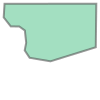

In [5]:
# Generate the boundary layer
poly = boundary_json.loc[0,'geometry']
poly

In [6]:
boundary_json.to_file('.././02 Data/Shapefile/Tangible-Table/tangibletable_boundary')

# Roads

In [8]:
import geopandas as gpd
import osmnx as ox

%matplotlib inline
ox.__version__

'1.1.1'

In [9]:
G = ox.graph_from_polygon(poly, network_type="drive")

In [10]:
G_proj = ox.project_graph(G)
ox.save_graph_shapefile(G_proj, filepath=".././02 Data/Shapefile/Tangible-Table/tangibletable_road")

C:\Users\a9048\anaconda3\envs\new_mobility\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
